## I. Read Data (Only Statistic Features)

In [97]:
import os
import sys
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")


# Find project root directory automatically
def find_project_root():
    current_dir = os.getcwd()
    while current_dir != "/":
        if any(
            marker in os.listdir(current_dir)
            for marker in [
                ".gitignore",
                "requirements.txt",
                "setup.py",
                "pyproject.toml",
            ]
        ):
            return current_dir
        current_dir = os.path.dirname(current_dir)
    return os.getcwd()  # fallback to current directory


project_root = find_project_root()

train_stat_df_path = os.path.join(project_root, "data/train_statistic_features.csv")
val_stat_df_path = os.path.join(project_root, "data/val_statistic_features.csv")
train_tfidf_df_path = os.path.join(project_root, "data/train_tfidf_features.csv")
val_tfidf_df_path = os.path.join(project_root, "data/val_tfidf_features.csv")
train_bow_df_path = os.path.join(project_root, "data/train_bow_features.csv")
val_bow_df_path = os.path.join(project_root, "data/val_bow_features.csv")
test_stat_df_path = os.path.join(project_root, "data/test_statistic_features.csv")
test_tfidf_df_path = os.path.join(project_root, "data/test_tfidf_features.csv")
test_bow_df_path = os.path.join(project_root, "data/test_bow_features.csv")

train_stat_df = pd.read_csv(train_stat_df_path)
val_stat_df = pd.read_csv(val_stat_df_path)
test_stat_df = pd.read_csv(test_stat_df_path)


print("Shape Train:", train_stat_df.shape)
print("Shape Validation:", val_stat_df.shape)
print("Columns Train:", train_stat_df.columns)

Shape Train: (152, 45)
Shape Validation: (19, 45)
Columns Train: Index(['file_1', 'file_2', 'label', 'file1_char_count', 'file1_word_count',
       'file1_sentence_count', 'file1_avg_sentence_length',
       'file1_english_word_ratio', 'file1_has_non_english_script',
       'file1_has_mixed_scripts', 'file1_unicode_control_chars',
       'file1_num_count', 'file1_repetition_score', 'file1_perplexity_score',
       'file1_ttr_ratio', 'file2_char_count', 'file2_word_count',
       'file2_sentence_count', 'file2_avg_sentence_length',
       'file2_english_word_ratio', 'file2_has_non_english_script',
       'file2_has_mixed_scripts', 'file2_unicode_control_chars',
       'file2_num_count', 'file2_repetition_score', 'file2_perplexity_score',
       'file2_ttr_ratio', 'diff_char_count', 'ratio_char_count',
       'diff_word_count', 'ratio_word_count', 'diff_sentence_count',
       'ratio_sentence_count', 'diff_avg_sentence_length',
       'diff_english_word_ratio', 'diff_has_non_english_scri

In [98]:
pd.read_csv("/home/thangquang09/CODE/CTAI_MachineLearning/data/fake-or-real-the-impostor-hunt/data/train.csv")['real_text_id'].value_counts()

real_text_id
2    49
1    46
Name: count, dtype: int64

Có thể đọc mô tả các features ở [đây](../data/README.md#processed-features-information)

In [99]:
X_train, y_train = (
    train_stat_df.drop(columns=["label", "file_1", "file_2"]),
    train_stat_df["label"],
)
X_val, y_val = (
    val_stat_df.drop(columns=["label", "file_1", "file_2"]),
    val_stat_df["label"],
)

## 

In [100]:
# Check for columns that contain only zeros
zero_columns = (X_train == 0).all()
zero_column_names = zero_columns[zero_columns].index.tolist()

print(f"Number of columns with all zeros: {len(zero_column_names)}")
print(f"Zero columns: {zero_column_names}")

# Also check the percentage of zeros in each column
zero_percentages = (X_train == 0).mean() * 100
high_zero_columns = zero_percentages[zero_percentages > 70].sort_values(ascending=False)

print(f"\nColumns with >90% zeros:")
print(high_zero_columns)

# Remove columns with >80% zeros
high_zero_threshold = 80
columns_to_remove = zero_percentages[
    zero_percentages > high_zero_threshold
].index.tolist()

print(f"\nColumns to remove (>80% zeros): {columns_to_remove}")

# Remove these columns from X_train and X_val
X_train = X_train.drop(columns=columns_to_remove)
X_val = X_val.drop(columns=columns_to_remove)

print(f"New shape after removing high-zero columns:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")

Number of columns with all zeros: 0
Zero columns: []

Columns with >90% zeros:
diff_sentence_count             98.684211
file1_has_mixed_scripts         90.131579
file1_has_non_english_script    90.131579
file2_has_non_english_script    90.131579
file2_has_mixed_scripts         90.131579
diff_has_non_english_script     80.263158
diff_has_mixed_scripts          80.263158
dtype: float64

Columns to remove (>80% zeros): ['file1_has_non_english_script', 'file1_has_mixed_scripts', 'file2_has_non_english_script', 'file2_has_mixed_scripts', 'diff_sentence_count', 'diff_has_non_english_script', 'diff_has_mixed_scripts']
New shape after removing high-zero columns:
X_train: (152, 35)
X_val: (19, 35)


## Modeling

### 1. Decision Tree

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)
print("Decision Tree: Validation Accuracy:", accuracy_score(y_val, y_pred))

Decision Tree: Validation Accuracy: 0.7894736842105263


### 2. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=42, n_estimators=100, min_samples_split=5
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("Random Forest: Validation Accuracy:", accuracy_score(y_val, y_pred))

Random Forest: Validation Accuracy: 0.8947368421052632


### 3. SVM

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Try different SVM kernels and print validation accuracy for each

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

kernels = ["linear", "rbf", "poly", "sigmoid"]

for kernel in kernels:
    svm_model = SVC(random_state=42, kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"SVM ({kernel}): Validation Accuracy: {accuracy:.4f}")

SVM (linear): Validation Accuracy: 0.8421
SVM (rbf): Validation Accuracy: 0.8421
SVM (poly): Validation Accuracy: 0.7895
SVM (sigmoid): Validation Accuracy: 0.8421


### 4. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_val)
print("Logistic Regression: Validation Accuracy:", accuracy_score(y_val, y_pred))

Logistic Regression: Validation Accuracy: 0.8947368421052632


### 6. KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_val_scaled)
print("KNN: Validation Accuracy:", accuracy_score(y_val, y_pred))

KNN: Validation Accuracy: 0.8421052631578947


### 5. Naive Bayes

In [29]:
# Do các đặc trưng là các giá trị liên tục và có âm nên ta thử nghiệm Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_val_scaled)
print("Naive Bayes: Validation Accuracy:", accuracy_score(y_val, y_pred))

Naive Bayes: Validation Accuracy: 0.5789473684210527


### 6. Boosting Model

In [101]:

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

cat_model = CatBoostClassifier(
    random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0
)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_val)
print("CatBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))

lgb_model = LGBMClassifier(
    random_state=42, n_estimators=1000, learning_rate=0.1, num_leaves=31
)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_val)
print("LightGBM: Validation Accuracy:", accuracy_score(y_val, y_pred))


y_train_xgboost = y_train.copy() - 1
xgb_model = XGBClassifier(
    random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=6
)
xgb_model.fit(X_train, y_train_xgboost)

y_pred = xgb_model.predict(X_val) + 1
print("XGBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))

CatBoost: Validation Accuracy: 0.8947368421052632
[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Top 20 Features quan trọng nhất trong LightGBM:
 1. file2_word_count               | Importance: 180.0000
 2. file1_repetition_score         | Importance: 152.0000
 3. diff_repetition_score          | Importance: 152.0000
 4. file2_repetition_score         | Importance: 147.0000
 5. file1_word_count               | Importance: 146.0000
 6. file1_english_word_ratio       | Importance: 131.0000
 7. file1_perplexity_score         | Importance: 125.0000
 8. diff_english_word_ratio        | Importance: 125.0000
 9. file2_perplexity_score         | Importance: 123.0000
10. file2_english_word_ratio       | Importance: 123.0000
11. diff_ttr_ratio                 | Importance: 117.0000
12. file2_ttr_ratio                | Importance: 104.0000
13. diff_char_count                | Importance: 94.0000
14. file1_ttr_ratio                | Importance: 89.0000
15. diff_unicode_control_chars     | Importance: 82.0000
16. diff_num_count                 | Importance: 70.0000
17. file1_char_count        

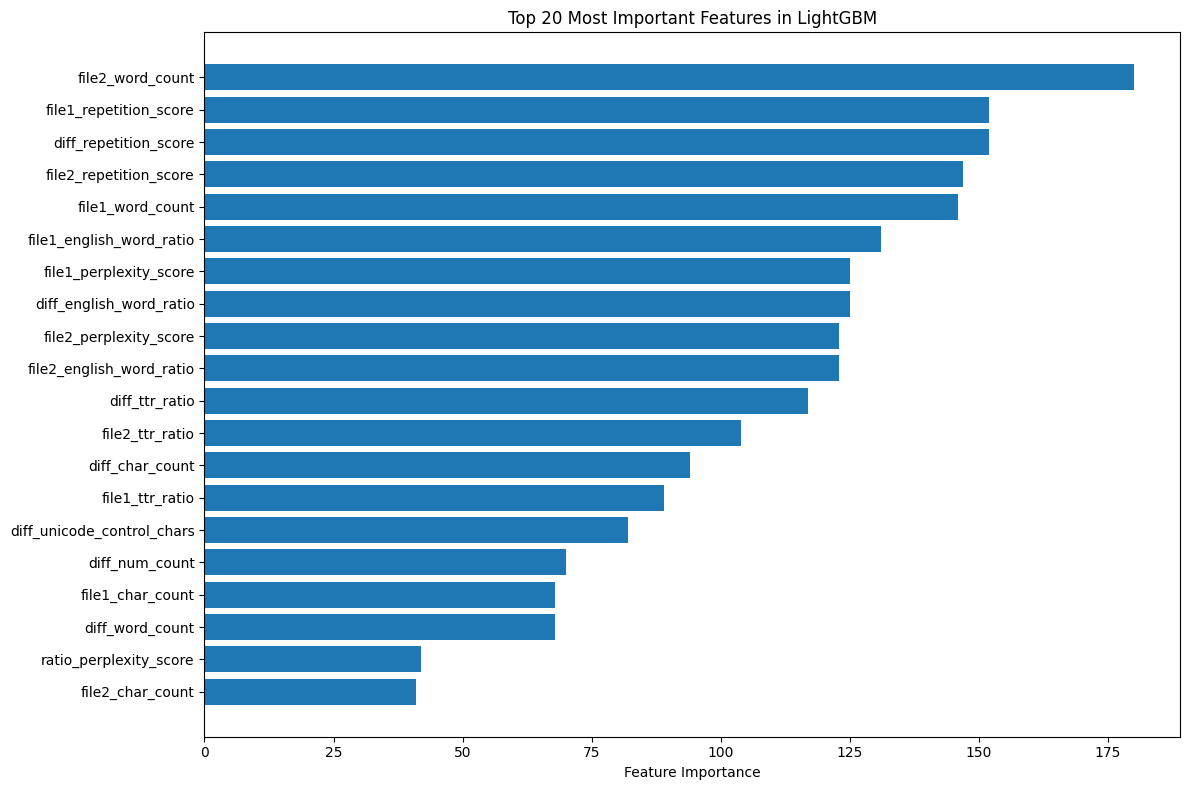

In [107]:
import matplotlib.pyplot as plt

# Lấy feature importances từ LightGBM model
feature_importances = lgb_model.feature_importances_

# Tạo tên cho các features (vì bạn đang concat nhiều loại features)
stat_feature_names = X_train.columns.tolist()
# tfidf_feature_names = [f"tfidf_{i}" for i in range(train.shape[1])]
all_feature_names = stat_feature_names

# Tạo DataFrame để dễ xử lý
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# In ra top 20 features quan trọng nhất
print("Top 20 Features quan trọng nhất trong LightGBM:")
print("=" * 50)
for i, (idx, row) in enumerate(feature_importance_df.head(20).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} | Importance: {row['importance']:.4f}")

# Vẽ biểu đồ top 20 features
plt.figure(figsize=(12, 8))
top_20_features = feature_importance_df.head(20)
plt.barh(range(len(top_20_features)), top_20_features['importance'])
plt.yticks(range(len(top_20_features)), top_20_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features in LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.show()

# # Lưu kết quả vào file CSV nếu muốn
# feature_importance_df.to_csv('lgb_feature_importance.csv', index=False)
# print(f"\n✅ Feature importance đã được lưu vào lgb_feature_importance.csv")

## II. Data with TFIDF Features

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

train_tfidf_df = pd.read_csv(train_tfidf_df_path)
val_tfidf_df = pd.read_csv(val_tfidf_df_path)

# Scale statistical features first
# columns_drop = zero_column_names.extend()

X_train_stat = train_stat_df.drop(columns=["label", "file_1", "file_2"])
X_val_stat = val_stat_df.drop(columns=["label", "file_1", "file_2"])

X_train_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")
X_val_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_stat)
X_val_scaled = scaler.transform(X_val_stat)

# Concatenate scaled statistical features with TFIDF features
X_train = np.concatenate([X_train_scaled, train_tfidf_df.values], axis=1)
X_val = np.concatenate([X_val_scaled, val_tfidf_df.values], axis=1)
y_train = train_stat_df["label"]
y_val = val_stat_df["label"]
["label", "file_1", "file_2"].extend(zero_column_names)
print(X_train.shape, X_val.shape)


(152, 85) (19, 85)


## Modeling

In [32]:
# =============================================================================
# DECISION TREE MODEL
# =============================================================================
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)
print("Decision Tree: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# RANDOM FOREST MODEL
# =============================================================================
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=100, min_samples_split=5
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("Random Forest: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# SUPPORT VECTOR MACHINE (SVM) MODELS
# =============================================================================
kernels = ["linear", "rbf", "poly", "sigmoid"]

for kernel in kernels:
    svm_model = SVC(random_state=42, kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"SVM ({kernel}): Validation Accuracy: {accuracy:.4f}")

# =============================================================================
# LOGISTIC REGRESSION MODEL
# =============================================================================
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_val)
print("Logistic Regression: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# CATBOOST MODEL
# =============================================================================
cat_model = CatBoostClassifier(
    random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0
)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_val)
print("CatBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# LIGHTGBM MODEL
# =============================================================================
lgb_model = LGBMClassifier(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    force_col_wise=True,
)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_val)
print("LightGBM: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# XGBOOST MODEL
# =============================================================================
y_train_xgboost = y_train.copy() - 1
xgb_model = XGBClassifier(
    random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=6
)
xgb_model.fit(X_train, y_train_xgboost)

y_pred = xgb_model.predict(X_val) + 1
print("XGBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))


Decision Tree: Validation Accuracy: 0.7894736842105263
Random Forest: Validation Accuracy: 0.8421052631578947
SVM (linear): Validation Accuracy: 0.8421
SVM (rbf): Validation Accuracy: 0.8421
SVM (poly): Validation Accuracy: 0.8421
SVM (sigmoid): Validation Accuracy: 0.8421
Logistic Regression: Validation Accuracy: 0.8421052631578947
CatBoost: Validation Accuracy: 0.7894736842105263
[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGBM] [Info] Total Bins 4062
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

## II. Data with BOW Features

In [33]:
train_bow_df = pd.read_csv(train_bow_df_path)
val_bow_df = pd.read_csv(val_bow_df_path)

# Scale statistical features first
X_train_stat = train_stat_df.drop(columns=["label", "file_1", "file_2"])
X_val_stat = val_stat_df.drop(columns=["label", "file_1", "file_2"])

X_train_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")
X_val_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_stat)
X_val_scaled = scaler.transform(X_val_stat)

# Concatenate scaled statistical features with BOW features
X_train = np.concatenate([X_train_scaled, train_bow_df.values], axis=1)
X_val = np.concatenate([X_val_scaled, val_bow_df.values], axis=1)
y_train = train_stat_df["label"]
y_val = val_stat_df["label"]

print(X_train.shape, X_val.shape)

(152, 85) (19, 85)


In [ ]:
# =============================================================================
# DECISION TREE MODEL
# =============================================================================
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_val)
print("Decision Tree: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# RANDOM FOREST MODEL
# =============================================================================
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=100, min_samples_split=5
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("Random Forest: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# SUPPORT VECTOR MACHINE (SVM) MODELS
# =============================================================================
kernels = ["linear", "rbf", "poly", "sigmoid"]

for kernel in kernels:
    svm_model = SVC(random_state=42, kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"SVM ({kernel}): Validation Accuracy: {accuracy:.4f}")

# =============================================================================
# LOGISTIC REGRESSION MODEL
# =============================================================================
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_val)
print("Logistic Regression: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# CATBOOST MODEL
# =============================================================================
cat_model = CatBoostClassifier(
    random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0
)
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_val)
print("CatBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# LIGHTGBM MODEL
# =============================================================================
lgb_model = LGBMClassifier(
    random_state=42,
    n_estimators=1000,
    learning_rate=0.1,
    num_leaves=31,
    force_col_wise=True,
)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_val)
print("LightGBM: Validation Accuracy:", accuracy_score(y_val, y_pred))

# =============================================================================
# XGBOOST MODEL
# =============================================================================
y_train_xgboost = y_train.copy() - 1
xgb_model = XGBClassifier(
    random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=6
)
xgb_model.fit(X_train, y_train_xgboost)

y_pred = xgb_model.predict(X_val) + 1
print("XGBoost: Validation Accuracy:", accuracy_score(y_val, y_pred))


Decision Tree: Validation Accuracy: 0.8421052631578947
Random Forest: Validation Accuracy: 0.8421052631578947
SVM (linear): Validation Accuracy: 0.7368
SVM (rbf): Validation Accuracy: 0.8947
SVM (poly): Validation Accuracy: 0.8421
SVM (sigmoid): Validation Accuracy: 0.8421
Logistic Regression: Validation Accuracy: 0.8421052631578947
CatBoost: Validation Accuracy: 0.8947368421052632
[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGBM] [Info] Total Bins 4062
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

### Hyper Params Tuning (Statistic + BOW)

In [51]:
import optuna


def objective_catboost(trial):
    """Hàm mục tiêu để Optuna tối ưu cho CatBoost."""

    # Định nghĩa không gian tìm kiếm siêu tham số
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "random_state": 42,
    }

    # Khởi tạo và huấn luyện mô hình
    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    # Đánh giá trên tập validation
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

In [52]:
print("Bắt đầu tuning cho CatBoost...")
study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)  # Chạy 50 lần


print("\nQuá trình tuning CatBoost hoàn tất!")
print(f"Best trial score (accuracy): {study_catboost.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study_catboost.best_params.items():
    print(f"  {key}: {value}")
print("-" * 50)

[I 2025-08-21 23:14:54,639] A new study created in memory with name: no-name-09d2f585-6450-4e15-bce2-a14f4c9bfd79


Bắt đầu tuning cho CatBoost...


[I 2025-08-21 23:14:59,049] Trial 0 finished with value: 0.8421052631578947 and parameters: {'iterations': 790, 'depth': 8, 'learning_rate': 0.029240026840304453, 'l2_leaf_reg': 3.141364959579934, 'random_strength': 8.247539413304821e-06, 'bagging_temperature': 0.6712264295942347, 'border_count': 227}. Best is trial 0 with value: 0.8421052631578947.
[I 2025-08-21 23:15:20,125] Trial 1 finished with value: 0.8947368421052632 and parameters: {'iterations': 1568, 'depth': 10, 'learning_rate': 0.0065115284816979835, 'l2_leaf_reg': 3.8485817693312527, 'random_strength': 1.3044895731224698e-07, 'bagging_temperature': 0.6884458547028321, 'border_count': 123}. Best is trial 1 with value: 0.8947368421052632.
[I 2025-08-21 23:15:24,267] Trial 2 finished with value: 0.8947368421052632 and parameters: {'iterations': 1814, 'depth': 7, 'learning_rate': 0.048522078292511886, 'l2_leaf_reg': 1.5186540003824764, 'random_strength': 5.143744425162684e-06, 'bagging_temperature': 0.2369694982504198, 'border


Quá trình tuning CatBoost hoàn tất!
Best trial score (accuracy): 0.8947
Best hyperparameters:
  iterations: 1568
  depth: 10
  learning_rate: 0.0065115284816979835
  l2_leaf_reg: 3.8485817693312527
  random_strength: 1.3044895731224698e-07
  bagging_temperature: 0.6884458547028321
  border_count: 123
--------------------------------------------------


In [36]:
def objective_svm(trial):
    """Hàm mục tiêu để Optuna tối ưu cho SVM."""

    # Định nghĩa không gian tìm kiếm siêu tham số
    params = {
        "C": trial.suggest_float("C", 1e-2, 1e2, log=True),
        "gamma": trial.suggest_float("gamma", 1e-4, 1e-1, log=True),
        "kernel": "rbf",
        "random_state": 42,
    }

    # Khởi tạo và huấn luyện mô hình
    model = SVC(**params)
    model.fit(X_train, y_train)

    # Đánh giá
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy


print("\nBắt đầu tuning cho SVM (RBF)...")
study_svm = optuna.create_study(direction="maximize")
study_svm.optimize(
    objective_svm, n_trials=100, timeout=600
)  # Chạy 100 lần hoặc trong 10 phút

print("\nQuá trình tuning SVM hoàn tất!")
print(f"Best trial score (accuracy): {study_svm.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study_svm.best_params.items():
    print(f"  {key}: {value}")
print("-" * 50)

[I 2025-08-21 23:08:17,097] A new study created in memory with name: no-name-ec0c9beb-746a-428c-9dce-44e328c2fccc
[I 2025-08-21 23:08:17,104] Trial 0 finished with value: 0.6842105263157895 and parameters: {'C': 55.08518668896078, 'gamma': 0.07173559798303256}. Best is trial 0 with value: 0.6842105263157895.
[I 2025-08-21 23:08:17,107] Trial 1 finished with value: 0.6842105263157895 and parameters: {'C': 0.8087790601484058, 'gamma': 0.021092949658385967}. Best is trial 0 with value: 0.6842105263157895.
[I 2025-08-21 23:08:17,111] Trial 2 finished with value: 0.7894736842105263 and parameters: {'C': 0.044668345692760486, 'gamma': 0.0025586678403146964}. Best is trial 2 with value: 0.7894736842105263.
[I 2025-08-21 23:08:17,114] Trial 3 finished with value: 0.8421052631578947 and parameters: {'C': 0.02864190179581928, 'gamma': 0.0012280421446768074}. Best is trial 3 with value: 0.8421052631578947.
[I 2025-08-21 23:08:17,117] Trial 4 finished with value: 0.8947368421052632 and parameters:


Bắt đầu tuning cho SVM (RBF)...


[I 2025-08-21 23:08:17,302] Trial 44 finished with value: 0.8947368421052632 and parameters: {'C': 7.387580805652581, 'gamma': 0.007055867227607033}. Best is trial 30 with value: 1.0.
[I 2025-08-21 23:08:17,308] Trial 45 finished with value: 0.7894736842105263 and parameters: {'C': 2.7976937508010087, 'gamma': 0.013944277462155387}. Best is trial 30 with value: 1.0.
[I 2025-08-21 23:08:17,314] Trial 46 finished with value: 0.9473684210526315 and parameters: {'C': 1.9213257394818228, 'gamma': 0.004215525423577248}. Best is trial 30 with value: 1.0.
[I 2025-08-21 23:08:17,320] Trial 47 finished with value: 0.8421052631578947 and parameters: {'C': 25.24656277018434, 'gamma': 0.0028338701257701764}. Best is trial 30 with value: 1.0.
[I 2025-08-21 23:08:17,326] Trial 48 finished with value: 0.6842105263157895 and parameters: {'C': 1.0184555248562452, 'gamma': 0.0287407224548322}. Best is trial 30 with value: 1.0.
[I 2025-08-21 23:08:17,332] Trial 49 finished with value: 0.9473684210526315 a


Quá trình tuning SVM hoàn tất!
Best trial score (accuracy): 1.0000
Best hyperparameters:
  C: 27.023593525639352
  gamma: 0.0038919385515236416
--------------------------------------------------


## III. Tạo Submission

In [85]:
train_bow_df = pd.read_csv(train_bow_df_path)
val_bow_df = pd.read_csv(val_bow_df_path)

# Scale statistical features first
X_train_stat = train_stat_df.drop(columns=["label", "file_1", "file_2"])
X_val_stat = val_stat_df.drop(columns=["label", "file_1", "file_2"])

X_train_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")
X_val_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_stat)
X_val_scaled = scaler.transform(X_val_stat)

# Concatenate scaled statistical features with BOW features
X_train = np.concatenate([X_train_scaled, train_bow_df.values], axis=1)
X_val = np.concatenate([X_val_scaled, val_bow_df.values], axis=1)
y_train = train_stat_df["label"]
y_val = val_stat_df["label"]

print(X_train.shape, X_val.shape)

(152, 85) (19, 85)


In [86]:
import sys

sys.path.append(os.path.join(project_root, "src"))

from load_data import read_texts_from_dir

df_test = read_texts_from_dir(
    os.path.join(project_root, "data/fake-or-real-the-impostor-hunt/data/test")
)

test_bow_df = pd.read_csv(test_bow_df_path)
X_test_stat = test_stat_df.drop(columns=["file_1", "file_2"])

X_test_stat.drop(columns=columns_to_remove, inplace=True, errors="ignore")
X_test_scaled = scaler.transform(X_test_stat)

X_test = np.concatenate([X_test_scaled, test_bow_df.values], axis=1)
print(X_test.shape)

Number of directories: 1068
(1068, 85)


In [ ]:
best_svm_model = SVC(**study_svm.best_params)
best_svm_model.fit(X_train, y_train)

svm_test_y_pred = best_svm_model.predict(X_test)

In [73]:
from pathlib import Path

# --- Build submission -------------------------------------------------
def make_submission(y_pred, file_name):
    submission = pd.DataFrame({
        "id": df_test.index,
        "real_text_id": y_pred.astype(int)
    }).sort_values("id")

    save_path = Path(file_name)
    submission.to_csv(save_path, index=False)
    print(f"✅ Submission saved to {save_path.resolve()}")

# make_submission(svm_test_y_pred, "submission_svm.csv")

SVM TEST 76%

In [53]:
best_catboost_model = CatBoostClassifier(**study_catboost.best_params)
best_catboost_model.fit(X_train, y_train)

catboost_test_y_pred = best_catboost_model.predict(X_test)

0:	learn: 0.6879250	total: 15.8ms	remaining: 24.7s
1:	learn: 0.6831926	total: 28.9ms	remaining: 22.6s
2:	learn: 0.6799273	total: 43.2ms	remaining: 22.6s
3:	learn: 0.6765828	total: 54.8ms	remaining: 21.4s
4:	learn: 0.6728619	total: 68.9ms	remaining: 21.5s
5:	learn: 0.6669271	total: 82.7ms	remaining: 21.5s
6:	learn: 0.6615232	total: 96.8ms	remaining: 21.6s
7:	learn: 0.6585191	total: 112ms	remaining: 21.9s
8:	learn: 0.6530372	total: 130ms	remaining: 22.6s
9:	learn: 0.6493529	total: 144ms	remaining: 22.5s
10:	learn: 0.6456623	total: 159ms	remaining: 22.6s
11:	learn: 0.6387411	total: 174ms	remaining: 22.6s
12:	learn: 0.6351655	total: 188ms	remaining: 22.4s
13:	learn: 0.6322500	total: 204ms	remaining: 22.6s
14:	learn: 0.6293024	total: 217ms	remaining: 22.5s
15:	learn: 0.6236689	total: 231ms	remaining: 22.4s
16:	learn: 0.6198496	total: 243ms	remaining: 22.1s
17:	learn: 0.6157191	total: 259ms	remaining: 22.3s
18:	learn: 0.6123464	total: 273ms	remaining: 22.2s
19:	learn: 0.6084071	total: 286ms	

In [55]:
from pathlib import Path

# --- Build submission -------------------------------------------------
submission = pd.DataFrame({
    "id": df_test.index,
    "real_text_id": catboost_test_y_pred.astype(int)
}).sort_values("id")

save_path = Path("submission_catboost.csv")
submission.to_csv(save_path, index=False)
print(f"✅ Submission saved to {save_path.resolve()}")

✅ Submission saved to /home/thangquang09/CODE/CTAI_MachineLearning/notebooks/submission_catboost.csv


CATBOOST TEST 74%

## Applied Pre-trained Embedding

In [56]:
from sentence_transformers import SentenceTransformer

model_name = 'intfloat/multilingual-e5-small'
model = SentenceTransformer(model_name)

In [61]:
def extract_embedding_features(df):

    # Trích xuất embeddings cho file_1
    emb_f1 = model.encode(df["file_1"].tolist(), show_progress_bar=True)

    # Trích xuất embeddings cho file_2
    emb_f2 = model.encode(df["file_2"].tolist(), show_progress_bar=True)

    # 1. Difference features
    emb_diff = emb_f1 - emb_f2

    # 2. Cosine similarity
    cosine_sim = np.sum(emb_f1 * emb_f2, axis=1) / (
        np.linalg.norm(emb_f1, axis=1) * np.linalg.norm(emb_f2, axis=1) + 1e-8
    )
    cosine_sim = cosine_sim.reshape(-1, 1)
    # 3. Euclidean distance
    euclidean_dist = np.linalg.norm(emb_diff, axis=1, keepdims=True)
    
    embedding_features = np.concatenate([
        emb_f1,
        emb_f2,
        emb_diff,
        cosine_sim,
        euclidean_dist
    ], axis=1)
    
    return embedding_features

In [87]:
train_embedding_features = extract_embedding_features(train_stat_df)
val_embedding_features = extract_embedding_features(val_stat_df)

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Batches: 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


In [92]:
test_embedding_features = extract_embedding_features(test_stat_df)

Batches: 100%|██████████| 34/34 [00:46<00:00,  1.38s/it]


In [88]:
# Concat features
X_train = np.concatenate([X_train_scaled, train_embedding_features], axis=1)
X_val = np.concatenate([X_val_scaled, val_embedding_features], axis=1)

### Logistic Regression

In [93]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_val)
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred))


X_test = np.concatenate([X_test_scaled, test_embedding_features], axis=1)
y_pred_test = logistic_model.predict(X_test)
make_submission(y_pred_test, 'logistic_model_test_submission.csv')

LogisticRegression Accuracy: 0.8947368421052632
✅ Submission saved to /home/thangquang09/CODE/CTAI_MachineLearning/notebooks/logistic_model_test_submission.csv


74,9%

## Catboost

In [72]:
print("Bắt đầu tuning cho CatBoost...")
study_catboost = optuna.create_study(direction="maximize")
study_catboost.optimize(objective_catboost, n_trials=50)  # Chạy 50 lần


print("\nQuá trình tuning CatBoost hoàn tất!")
print(f"Best trial score (accuracy): {study_catboost.best_value:.4f}")
print("Best hyperparameters:")
for key, value in study_catboost.best_params.items():
    print(f"  {key}: {value}")
print("-" * 50)

[I 2025-08-22 09:47:34,808] A new study created in memory with name: no-name-81045da0-43d9-411b-8275-0154a932f0ea


Bắt đầu tuning cho CatBoost...


[I 2025-08-22 09:49:52,195] Trial 0 finished with value: 0.8947368421052632 and parameters: {'iterations': 1689, 'depth': 8, 'learning_rate': 0.03803760008166677, 'l2_leaf_reg': 7.371972391225178, 'random_strength': 0.04116519126262086, 'bagging_temperature': 0.2124465968814916, 'border_count': 188}. Best is trial 0 with value: 0.8947368421052632.
[I 2025-08-22 09:50:22,188] Trial 1 finished with value: 0.8947368421052632 and parameters: {'iterations': 1230, 'depth': 6, 'learning_rate': 0.0031137377140539467, 'l2_leaf_reg': 3.2295830470451863, 'random_strength': 4.933739825423745e-05, 'bagging_temperature': 0.36524139296276437, 'border_count': 186}. Best is trial 0 with value: 0.8947368421052632.
[I 2025-08-22 09:50:52,271] Trial 2 finished with value: 0.8947368421052632 and parameters: {'iterations': 1232, 'depth': 6, 'learning_rate': 0.0018202956810706202, 'l2_leaf_reg': 1.0685962611773323, 'random_strength': 2.1651018570134604e-07, 'bagging_temperature': 0.39533016541530575, 'border


Quá trình tuning CatBoost hoàn tất!
Best trial score (accuracy): 0.9474
Best hyperparameters:
  iterations: 1751
  depth: 7
  learning_rate: 0.09683629708679942
  l2_leaf_reg: 6.085843312001857
  random_strength: 3.250486359638047
  bagging_temperature: 0.6274999635187519
  border_count: 165
--------------------------------------------------


In [74]:
catboost_model = CatBoostClassifier(**study_catboost.best_params)
catboost_model.fit(X_train, y_train)

0:	learn: 0.6596131	total: 60.9ms	remaining: 1m 46s
1:	learn: 0.6260120	total: 109ms	remaining: 1m 35s
2:	learn: 0.6028862	total: 160ms	remaining: 1m 32s
3:	learn: 0.5773316	total: 206ms	remaining: 1m 29s
4:	learn: 0.5447066	total: 257ms	remaining: 1m 29s
5:	learn: 0.5227510	total: 304ms	remaining: 1m 28s
6:	learn: 0.4925718	total: 354ms	remaining: 1m 28s
7:	learn: 0.4665707	total: 406ms	remaining: 1m 28s
8:	learn: 0.4349199	total: 453ms	remaining: 1m 27s
9:	learn: 0.4146653	total: 501ms	remaining: 1m 27s
10:	learn: 0.3933311	total: 553ms	remaining: 1m 27s
11:	learn: 0.3771245	total: 602ms	remaining: 1m 27s
12:	learn: 0.3624443	total: 650ms	remaining: 1m 26s
13:	learn: 0.3462336	total: 697ms	remaining: 1m 26s
14:	learn: 0.3256083	total: 747ms	remaining: 1m 26s
15:	learn: 0.3098147	total: 794ms	remaining: 1m 26s
16:	learn: 0.2975197	total: 846ms	remaining: 1m 26s
17:	learn: 0.2865758	total: 900ms	remaining: 1m 26s
18:	learn: 0.2765446	total: 948ms	remaining: 1m 26s
19:	learn: 0.2673183	

In [76]:
y_pred = catboost_model.predict(X_val)
print("CatBoost with embeddings: Validation Accuracy:", accuracy_score(y_val, y_pred))

CatBoost with embeddings: Validation Accuracy: 0.8947368421052632


In [77]:
test_embedding_features = extract_embedding_features(test_stat_df)
X_test = np.concatenate([X_test, test_embedding_features], axis=1)

y_test_pred = catboost_model.predict(X_test)

Batches: 100%|██████████| 34/34 [00:47<00:00,  1.39s/it]


In [71]:
from pathlib import Path

# --- Build submission -------------------------------------------------
submission = pd.DataFrame({
    "id": df_test.index,
    "real_text_id": y_test_pred.astype(int)
}).sort_values("id")

save_path = Path("submission_catboost_embedding.csv")
submission.to_csv(save_path, index=False)
print(f"✅ Submission saved to {save_path.resolve()}")

✅ Submission saved to /home/thangquang09/CODE/CTAI_MachineLearning/notebooks/submission_catboost_embedding.csv


CATBOOST + EMBEDDING 84%

In [78]:
make_submission(y_test_pred, "submission_catboost_finetuned.csv")

✅ Submission saved to /home/thangquang09/CODE/CTAI_MachineLearning/notebooks/submission_catboost_finetuned.csv
